We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 2\Lab 21\airlines_passengers.csv')

Let’s display the first five rows of data

In [2]:
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.shape

(144, 2)

We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [4]:
data.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [5]:
data['Month'] = pd.to_datetime(data['Month'])
data.head(5)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


The next thing we can do is convert the month column to an index. 


In [6]:
data = data.set_index('Month')
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

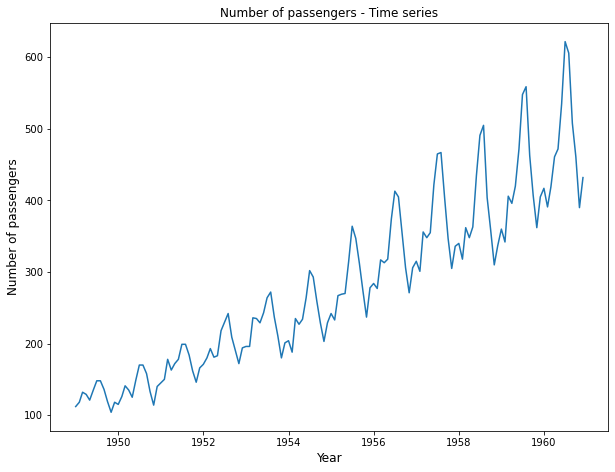

In [8]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(data)
plt.title('Number of passengers - Time series')
plt.xlabel('Year', fontsize=12)
plt.ylabel("Number of passengers",  fontsize =12)
plt.show()

#Data are non stationary

In [9]:
# Split the dataset
X = data.Passengers
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]  # split the data in 2 subsets to check that our means and variances are not the same
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2275.694640, variance2=7471.736307


Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [12]:
result = adfuller(data.Passengers)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])

# The p-value is greater than 0.05. You fail to reject the null hypothesis and conclude that the time series is not stationary.

ADF Test Statistic: 0.82
5% Critical Value: -2.88
p-value: 0.99


Store our results in a dataframe display it

Explain the results

In [13]:
pd.DataFrame(result)

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

In [14]:
#Code for Durbin Watson test
import numpy as np
import statsmodels.api as sm

X =np.arange(len(data))
Y = np.asarray(data)
X = sm.add_constant(X)

from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()

# apply durbin watson statistic on the ols residual
print(durbin_watson(ols_res.resid))

print('')
print('There is a positive autocorrelation. The more close it to 0, the more signs of positive autocorrelation.')

0.5371938961768883

There is a positive autocorrelation. The more close it to 0, the more signs of positive autocorrelation.


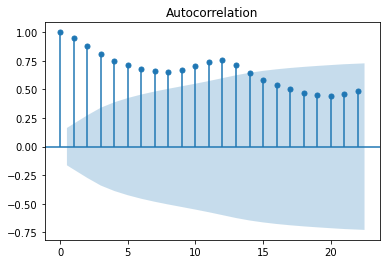

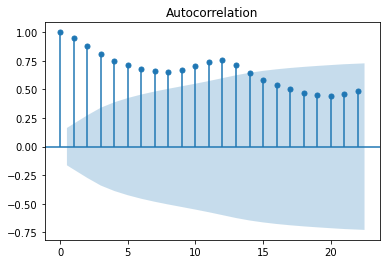

In [15]:
#Plot Autocorrelation

from statsmodels.tsa.stattools import acf

plot_acf(data)

#Each line reprsents the lags = 23 lags ; the points in the confidence interval(the blue part) there is no correlation
#Till the 16 points or lags there is significant correlation between the variables. The current observations depending of the previous observation
# From lag 16 to 23, there is no significant correlation between the variables.

Calculate partial autocorrelation

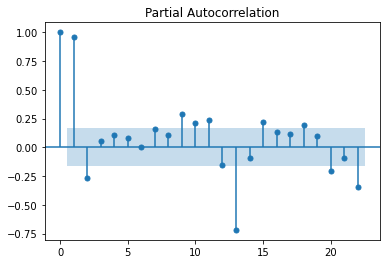

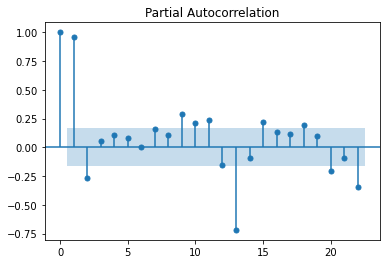

In [16]:
from statsmodels.tsa.stattools import pacf

plot_pacf(data)


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


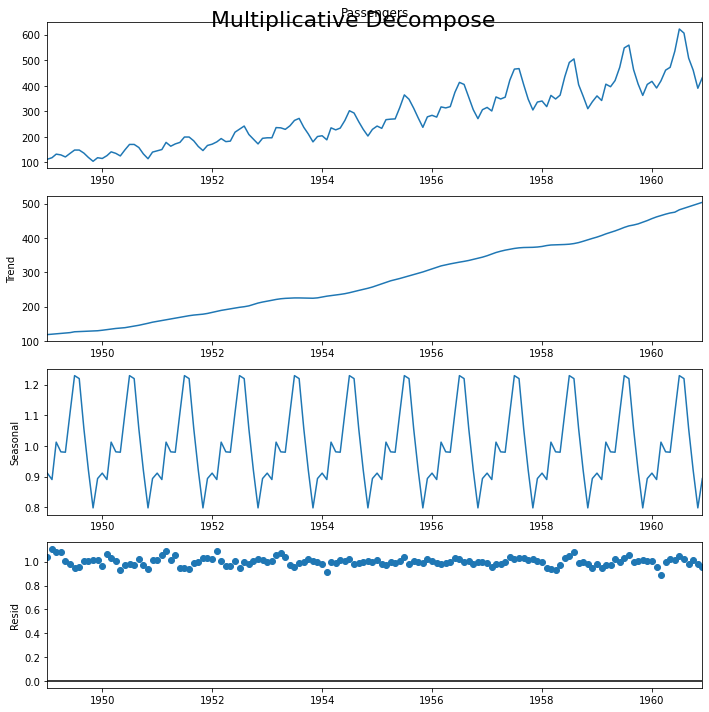

In [17]:
#Decomposition : make a hypothesis that we use the multiplicatif label

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data['Passengers'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()

#3rd chart : resid = error

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()



Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [18]:
#We use the difference method to have stationary data
data['Difference'] = data['Passengers'].diff()
data = data.drop(data.index[0])
data.head()

,Passengers,Difference
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0


In [19]:
data['Diff_log'] = np.log(data['Passengers']) 
data.head()

,Passengers,Difference,Diff_log
Month,,,
1949-02-01,118,6.0,4.770685
1949-03-01,132,14.0,4.882802
1949-04-01,129,-3.0,4.859812
1949-05-01,121,-8.0,4.795791
1949-06-01,135,14.0,4.905275


In [20]:
#Ad fuller to check stationary with Diff method
result = adfuller(data.Difference)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])


ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


In [21]:
#Ad fuller to check stationary with Diff method
result = adfuller(data.Diff_log)

print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])


ADF Test Statistic: -1.73
5% Critical Value: -2.88
p-value: 0.42


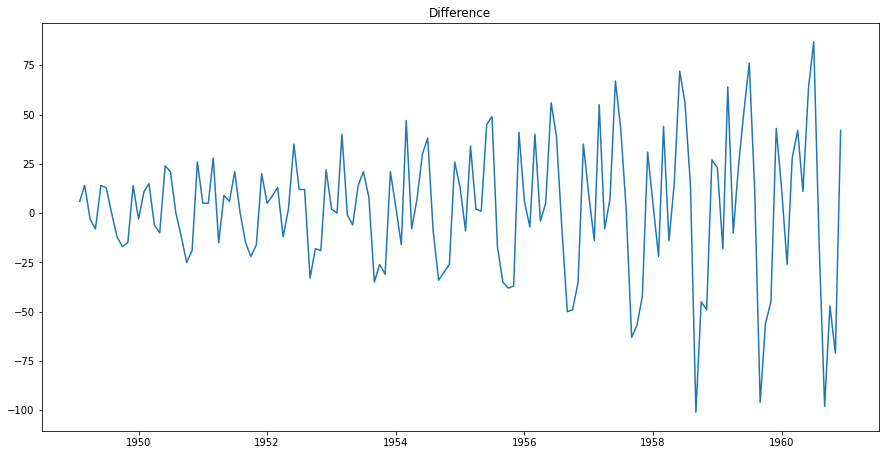

In [22]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['Difference'])
plt.title("Difference")
plt.show()

In [23]:
#we need to split our data (the difference column) to try our model
X = data.Difference
split = 2*round(len(X) / 3)

train,  test =X[0:split], X[split:]  # split the data in 2 subsets to check that our means and variances are not the same

#train = 96
# test = 47

In [24]:
train,  test =X[0:split], X[split:]  

# Tests method

MA(1)

In [25]:
# We try a model called Moving average MA --> MA(1) means the order = (0,1) and MA(2) means the order = (0,2)
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train.dropna(), order=(0,1))  #We do the model with the train
result = model.fit()

Display the output

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(0, 1)   Log Likelihood                -432.980
Method:                       css-mle   S.D. of innovations             21.987
Date:                Wed, 19 Jan 2022   AIC                            871.961
Time:                        17:33:55   BIC                            879.654
Sample:                    02-01-1949   HQIC                           875.071
                         - 01-01-1957                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0768      3.084      0.673      0.501      -3.968       8.122
ma.L1.Difference     0.3782      0.116      3.270      0.001       0.151       0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.6444           +0.0000j            2.6444            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
#Prediction with the test
model.predict(test)

array([-14.        , -13.63648381, -13.49751853, -13.80913603,
       -13.89437934, -13.49282947, -13.51831219, -13.75421251,
       -13.96810523, -14.05512536, -14.01717954, -13.49059674,
       -13.80926188, -13.54892251, -13.48092868, -13.86398311,
       -13.92974576, -13.31036826, -13.37617512, -13.75679682,
       -13.96805824, -14.20058076, -14.08726217, -13.27114069,
       -13.66779744, -13.6605855 , -13.24253481, -14.03195391,
       -13.5812372 , -13.64397751, -13.3701095 , -13.7569071 ,
       -14.02260169, -14.14504361, -14.03372648, -13.38120497,
       -13.66579627, -13.58789461, -13.51658373, -13.97242575,
       -13.70959226, -13.11437105, -13.54337507, -13.535575  ,
       -14.35389864, -14.06629275, -14.08970377, -13.34382357,
       -13.72102139, -13.75052688, -13.02271769, -13.78140513,
       -13.85851991, -13.49348146, -13.37284579, -13.6114028 ,
       -14.38888359, -14.21111121, -14.30525252, -13.35808632,
       -13.70258025, -14.04177127, -12.89014961, -13.91

In [28]:
#we need to compare the test 
test

Month
1957-02-01    -14.0
1957-03-01     55.0
1957-04-01     -8.0
1957-05-01      7.0
1957-06-01     67.0
1957-07-01     43.0
1957-08-01      2.0
1957-09-01    -63.0
1957-10-01    -57.0
1957-11-01    -42.0
1957-12-01     31.0
1958-01-01      4.0
1958-02-01    -22.0
1958-03-01     44.0
1958-04-01    -14.0
1958-05-01     15.0
1958-06-01     72.0
1958-07-01     56.0
1958-08-01     14.0
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
1959-02-01    -18.0
1959-03-01     64.0
1959-04-01    -10.0
1959-05-01     24.0
1959-06-01     52.0
1959-07-01     76.0
1959-08-01     11.0
1959-09-01    -96.0
1959-10-01    -56.0
1959-11-01    -45.0
1959-12-01     43.0
1960-01-01     12.0
1960-02-01    -26.0
1960-03-01     28.0
1960-04-01     42.0
1960-05-01     11.0
1960-06-01     63.0
1960-07-01     87.0
1960-08-01    -16.0
1960-09-01    -98.0
1960-10-01    -47.0
1960-11-01    -71.0
1960-12-01     42.0
Name: Difference, dtype: float64

MA(2)

In [29]:
model = ARMA(train.dropna(), order=(0,2))
result = model.fit()

Display the output

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(0, 2)   Log Likelihood                -431.089
Method:                       css-mle   S.D. of innovations             21.534
Date:                Wed, 19 Jan 2022   AIC                            870.179
Time:                        17:34:04   BIC                            880.436
Sample:                    02-01-1949   HQIC                           874.325
                         - 01-01-1957                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9912      2.168      0.919      0.358      -2.258       6.240
ma.L1.Difference     0.2857      0.125      2.286      0.022       0.041       0.531
ma.L2.Difference    -0.3027      0.164     -1.844      0.065      -0.624       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4058           +0.0000j            1.4058            0.5000
MA.2            2.3496           +0.0000j            2.3496            0.0000
-----------------------------------------------------------------------------
"""

AR(2)

In [31]:
# Try a AR(2) model
model = ARMA(train, order=(2, 0))
result = model.fit


In [35]:
train

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1956-09-01   -50.0
1956-10-01   -49.0
1956-11-01   -35.0
1956-12-01    35.0
1957-01-01     9.0
Name: Difference, Length: 96, dtype: float64

In [40]:
#m=ARMA(train, order=(2,0)).fit()
#m.predict(test, start=test.index[0], end=test.index[47])<

model_3 = ARMA(train.dropna(), order=(2, 0))
result_3 = model_3.fit()

In [41]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(2, 0)   Log Likelihood                -431.862
Method:                       css-mle   S.D. of innovations             21.730
Date:                Wed, 19 Jan 2022   AIC                            871.724
Time:                        17:46:40   BIC                            881.981
Sample:                    02-01-1949   HQIC                           875.870
                         - 01-01-1957                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0029      2.389      0.838      0.402      -2.680       6.685
ar.L1.Difference     0.3086      0.099      3.127      0.002       0.115       0.502
ar.L2.Difference    -0.2389      0.099     -2.410      0.016      -0.433      -0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6459           -1.9413j            2.0460           -0.1989
AR.2            0.6459           +1.9413j            2.0460            0.1989
-----------------------------------------------------------------------------
"""

In [43]:
model_3.predict(test)

array([  -14.        ,   108.22222222,  1366.        ,   367.        ,
         228.        ,  1478.        ,  1247.        ,   540.        ,
         -16.        ,  -195.        ,   -45.        ,  1534.        ,
         367.        ,  1273.        ,  1381.        ,   194.        ,
         142.        ,  2044.        ,  1607.        ,   476.        ,
         -16.        ,  -635.        ,  -201.        ,  2226.        ,
         711.        ,   879.        ,  2144.        ,  -405.        ,
        1259.        ,   902.        ,  1751.        ,   476.        ,
        -181.        ,  -446.        ,   -60.        ,  1872.        ,
         759.        ,  1099.        ,  1287.        ,  -120.        ,
         850.        ,  2553.        ,  1024.        ,  1208.        ,
       -1267.        ,   -82.        ,  -257.        ,  2006.        ,
         578.        ,   628.        ,  2844.        ,   269.        ,
         322.        ,  1462.        ,  1687.        ,   916.        ,
      

ARMA (?,?)

In [46]:
#ARMA(AR, MA) = ARMA(2,2)
model_4 = ARMA(train.dropna(), order=(2, 2))
result_4 = model_3.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(2, 0)   Log Likelihood                -431.862
Method:                       css-mle   S.D. of innovations             21.730
Date:                Wed, 19 Jan 2022   AIC                            871.724
Time:                        17:49:52   BIC                            881.981
Sample:                    02-01-1949   HQIC                           875.870
                         - 01-01-1957                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0029      2.389      0.838      0.402      -2.680       6.685
ar.L1.Difference     0.3086      0.099      3.127      0.002       0.115       0.502
ar.L2.Difference    -0.2389      0.099     -2.410      0.016      -0.433      -0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6459           -1.9413j            2.0460           -0.1989
AR.2            0.6459           +1.9413j            2.0460            0.1989
-----------------------------------------------------------------------------
"""

In [48]:
model_4.predict(test)

RuntimeError: Model must be fit before calling predict

Display the output

In [47]:
model_5 = ARMA(train.dropna(), order=(2, 3))
result_5 = model_3.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Difference   No. Observations:                   96
Model:                     ARMA(2, 0)   Log Likelihood                -431.862
Method:                       css-mle   S.D. of innovations             21.730
Date:                Wed, 19 Jan 2022   AIC                            871.724
Time:                        17:50:07   BIC                            881.981
Sample:                    02-01-1949   HQIC                           875.870
                         - 01-01-1957                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0029      2.389      0.838      0.402      -2.680       6.685
ar.L1.Difference     0.3086      0.099      3.127      0.002       0.115       0.502
ar.L2.Difference    -0.2389      0.099     -2.410      0.016      -0.433      -0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6459           -1.9413j            2.0460           -0.1989
AR.2            0.6459           +1.9413j            2.0460            0.1989
-----------------------------------------------------------------------------
"""

In [49]:
model_5.predict(test)

RuntimeError: Model must be fit before calling predict

ARIMA(?,?)

Display the output

In [ ]:
#ARIMA()
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(2,1,2))  #I is the number of columns
model_fit=model.fit()
model_fit.summary()

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [ ]:
RMSE = sqrt(mean_squared_error(test,model.predict(test)))
RMSE

Calculate AIC